# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction




> **Medical appointment no shows dataset analysis:**
This Dataset has information about more than 11 k patients in Brazil.It contains their medical history information and We need to investigate this Dataset to find out factors that affect patients attendance to the scheduled appointment. The main questions that we want to focus on is: What makes patients failing to attend their hospital appointment?

 **Dataset columns descriptions:**


 * PatientId - Patient identification.
 * AppointmentID - Appointment identification. 
 * Gender -  Patient gender (Male or Female).
 * ScheduledDay - The day patient set up their appointment.
 * AppointmentDay - The day of actual appointment when patient have to visit the doctor.
 * Age - patient Age
 * Neighbourhood - Hospital location.
 * Scholarship - Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família(0 for no & 1 for Yes).
 * Hipertension - Indicates whether or not the patient has hypertension or not(0 for no & 1 for Yes).
 * Diabetes - Indicates whether or not the patient has diabetes or not (0 for no & 1 for Yes).
 * Alcoholism - Indicates whether or not the patient has alcoholism or not (0 for no & 1 for Yes).
 * Handicap - Indicates whether or not the patient has handicap or not (on scale from 0 to 4 )
 * SMS_received = Indicates whether or not the patient received SMS (0 for no & 1 for Yes)
 * No-show = Indicates whether or not the patient attend the appointment(Yes for didn't show, No for show)


> **Questions:**


 * 1 - Does Gender affect the attendance?
     - ratio for Males who attended
     - ratio for Females who attended  
     
     
 * 2 - How the Alcoholism affect probability of show up?
     - ratio for patients who have alcoholism and attended the appointment.
     - ratio for patients who don't have alcoholism and attended the appointment.

     
     
 * 3 - How the Hypertension affect probability of show up?
     - ratio for patients who have hypertension and attended the appointment.
     - ratio for patients who don't have hypertension and attended the appointment.

     
     
 * 4 - How the Handicap affect probability of show up?
     - ratio for patients who have handicap and attended the appointment.
     - ratio for patients who don't have handicap and attended the appointment.

     
     
 * 5 - How the Diabetes affect probability of show up?
     - ratio for patients who have diabetes and attended the appointment.
     - ratio for patients who don't have diabetes and attended the appointment.
     
 * 6 - How the Scholarship affect probability of show up?
     - ratio for patients who have Scholarship and attended the appointment.
     - ratio for patients who don't have Scholarship and attended the appointment.

     
     
 * 7 - Does receiving SMS affect the attendance?
     - ratio for patients who received SMS and attended the appointment.
     - ratio for patients who didn't receive SMS and attended the appointment.

     
 * 8 - Does Age affect the attendance?
 
 
 * 9 - Does appointment delay affect the attendance?



### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling

   **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.



### General Properties ( Gathering and Assessing Data)

In [2]:
# loading CSV file in to main Dataframe variable //df//

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
#checking first 5 rows from Dataframe

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#checking Dataframe shape (number of rows and columns)

df.shape

(110527, 14)

In [5]:
# checking the basic informations from loaded data (columns names, number of values, data types ......)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#checking more information and descriptive statistics

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#checking more descriptive statistics for categorical data

df[["No-show","Gender","ScheduledDay","AppointmentDay","Neighbourhood"]].describe()

,No-show,Gender,ScheduledDay,AppointmentDay,Neighbourhood
count,110527,110527,110527,110527,110527
unique,2,2,103549,27,81
top,No,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI
freq,88208,71840,24,4692,7717


In [8]:
# checking for NaN values

df.isnull().sum().sum()

0

In [9]:
#checking for duplicated rows

df.duplicated().sum()

0

In [10]:
# checking rows which have negative Age 

df_negative_age = df.query("Age<0")
df_negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### as we can see from above informations: 
* there are no NaN values in any column.
* there are no duplicated rows
* there are one row with negative age value which is not logical at all

### Data Cleaning 
 
 *  Data that needs modification or changing:

    1.   it seems like [PatientId & AppointmentID] is useless so i'm going to drop them
    2.   there's one row has Age value -1 and this is not logical so i'm going to drop it
    3.   Change (ScheduledDay and AppointmentDay) columns names to (Scheduled_day and Appointment_day) to make it easy to read.
    4.   Change (ScheduledDay and AppointmentDay) types to Datetime to extract days from them
    5.   Appointment_Day column has no hours or minutes so i'm going to add 23:59:59 H to it to calculate waiting days accurately
    6.   Create new column (Wating_days) that indicates the difference days between scheduled day and appointment day
    7.   Change new column (Wating_days) type to int
    8.   Changing No-show column name to (Show).
    9.   Reverse all data inside Show column to be more clear:
           -  A. (1 will mean patient attended) 
           -  B. (0 will mean patient didn't attend)
    10.  Change Show column type to int
    


In [11]:
# (1) dropping PatientId & AppointmentID

df.drop(["PatientId","AppointmentID"], axis= 1 , inplace= True)

In [12]:
# (2) dropping any row with age value less than 0

df.drop(df_negative_age.index, inplace = True)

In [13]:
# checking that Age column has been dropped

df.query("Age<0")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [14]:
# (3) Fixing columns names and separate words by "_"

# (4) Changing Scheduled Date and Appointment Date data types to datetime


columns_names = ["ScheduledDay", "AppointmentDay"]
for col in columns_names:
    df[col] = pd.to_datetime(df[col])
    df.rename(columns = {col : col[:-3]+"_day"}, inplace=True)

In [15]:
# checking changes 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   Gender           110526 non-null  object             
 1   Scheduled_day    110526 non-null  datetime64[ns, UTC]
 2   Appointment_day  110526 non-null  datetime64[ns, UTC]
 3   Age              110526 non-null  int64              
 4   Neighbourhood    110526 non-null  object             
 5   Scholarship      110526 non-null  int64              
 6   Hipertension     110526 non-null  int64              
 7   Diabetes         110526 non-null  int64              
 8   Alcoholism       110526 non-null  int64              
 9   Handcap          110526 non-null  int64              
 10  SMS_received     110526 non-null  int64              
 11  No-show          110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usag

In [16]:
# (5) Appointment_Day column has no hours or minutes so i'm going to add 23:59:59 H to it to calculate waiting days accurately

df["Appointment_day"] =  df["Appointment_day"] + pd.Timedelta('1d') - pd.Timedelta('1s')

# (6) Create new column (Wating_days) that indicates the difference days between scheduled day and appointment day
# (7) Change new column (Wating_days) type to int

df["Wait_days"] = (df["Appointment_day"] - df["Scheduled_day"] ).dt.days.astype(int)

In [17]:
# checking types of columns data

df.dtypes

Gender                          object
Scheduled_day      datetime64[ns, UTC]
Appointment_day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handcap                          int64
SMS_received                     int64
No-show                         object
Wait_days                        int32
dtype: object

In [18]:
# checking Noshow columnvalue_counts

df["No-show"].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [19]:
# (8) Changing No-show column name to (Show) and &  make sure all columns names has no spaces on the first

df.rename(columns = {"No-show" : "Show"}, inplace=True)
df.rename(columns = lambda x : x.strip(), inplace=True)

In [20]:
# (9) Reverse all data inside Show column to be more clear

df["Show"] = df["Show"].apply(lambda x : 1 if x =="No" else 0 )

In [21]:
# (10) Change Show column type to int

df["Show"] = df["Show"].astype(int)

In [22]:
# checking for show column value_counts

df["Show"].value_counts()

1    88207
0    22319
Name: Show, dtype: int64

##### details about new coulmn "wait_days"

* if   wait_day == 0 appointment day & schedualed day are same - ontime
* if   wait_day < 0 appointment day before schedualed day - Early appointment
* if   wait_day > 0 appointment day after schedualed day - Delay appointment

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships
to answer the questions and detect the characteristics that affect patients attending to their hospital appointment


### Research Question 1
> #### Does Gender affect the attendance?
        - ratio for Males who attended
        - ratio for Females who attended

In [23]:
# checking the correlation between columns data

df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,Wait_days
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327,0.034811
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134,-0.030423
Hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704,-0.017218
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181,-0.027190
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197,-0.038520
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077,-0.019844
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428,0.398143
Show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000,-0.186228
Wait_days,0.034811,-0.030423,-0.017218,-0.027190,-0.038520,-0.019844,0.398143,-0.186228,1.000000


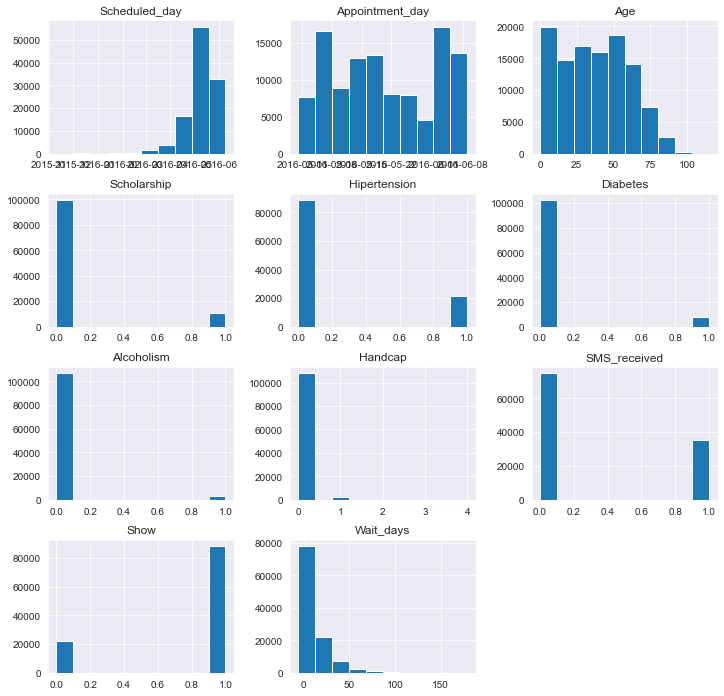

In [24]:
# checking the skewness between columns data

df.hist(figsize=(12,12), alpha=1);

In [25]:
# checking number of patients who attended and didn't attend

all_patients_count = df["Show"].value_counts()
all_patients_count

1    88207
0    22319
Name: Show, dtype: int64

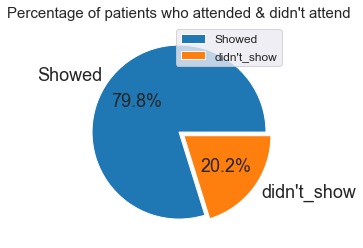

In [26]:
# Pie chart displays how many patient attended to appointment and how many didn't

plt.pie(all_patients_count,labels=["Showed", "didn't_show"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.07))
plt.rcParams['font.size'] = 12
plt.title("Percentage of patients who attended & didn't attend",fontsize=15)
plt.legend()
plt.show()

**We can see that 79.8% from all patients already attended and 20.2% didn't attend**


In [27]:
# Make Dataframe with only showed patients and other for only patients didn't show

df_show = df.query("Show == 1")
df_no_show = df.query("Show == 0")

In [28]:
def proportions_fun (df,lst,col):
    """
    This function to calculate proportions for specific columns using groupby and value counts
    and returns the proportions if all input data are correct
    or print "You have entered wrong input" if there is wrong input
    
    INPUT: 
    - df1 : dataframe which contains all patients who attended and didn't
    - lst : list which contains columns names that we need to groupby (groupby will be sorted as the same lst values sort)
    - col :string with specific column name (which we want to calculate proportion according to it)
    OUTPUT:
    - proportion : it's a pandas Series that contains grouped by lst values and propotions according to col
    """
    try:
        if df.empty == True:
            raise Exception('data frame is empty')
        for i in lst: 
            if i not in df:
                raise Exception('one or more of columns in list are not part of the dataframe')
        proportion = df.groupby(lst)[col].value_counts(normalize=True).unstack(col)
        return proportion
    except Exception as error:
        print("You have entered wrong input " + repr(error))

In [29]:
# Function test

#test1 correct data

expected = df.groupby(["Gender","Handcap"])["Show"].value_counts(normalize=True).unstack("Show")
found = proportions_fun(df, ["Gender","Handcap"], "Show")
expected.equals(found)

True

In [30]:
#test2 incorrect column name

proportions_fun(df, ["Gender","Handcap"], "wrong_column_name")

You have entered wrong input KeyError('Column not found: wrong_column_name')


In [31]:
#test3 incorrect list

proportions_fun(df, ["Gender","not_exsiting"], "Show")

You have entered wrong input Exception('one or more of columns in list are not part of the dataframe')


#### Now I'm going to use proportions_fun to calculate proportions for each factor trying to find correlations

In [32]:
# Males & Females proportions according to attended patients only (using proportions_fun)

gender_ratio = proportions_fun(df_show,["Show"],"Gender")
gender_ratio

Gender,F,M
Show,,
1,0.648985,0.351015


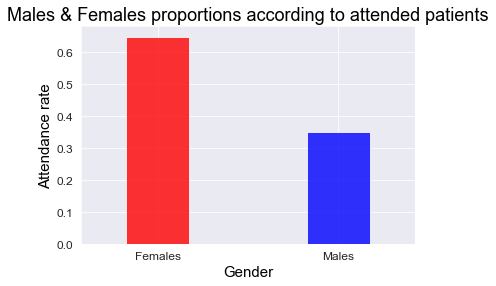

In [33]:
# Bar chart for Males & Females proportions according to attended patients only 

gender_ratio.unstack(False).plot(kind = "bar",
                                   rot = 0,
                                   width = 0.35,
                                   color=["r","b"],
                                   alpha = 0.8,
                                   fontsize = 12,
                                   )

plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Gender",fontsize=15, color="k")
plt.title("Males & Females proportions according to attended patients",fontsize=18, color="k")
labels = ["Females","Males"]
plt.xticks(range(len(labels)),labels);
#plt.figure(figsize=(8,5))
#plt.legend(["Attended"],fontsize=14);

**It's obvious that The attendance rate for Females is higher than males.The attendance ratio is 64.9% for Females and just 35,1% for males from all attended patients**

**to be more accurate we need to check the attendance ratio for males from all attended males against attendance ratio for females from all attended females**

In [34]:
# getting gender proportions using (proportions_fun)

gender_proportion = proportions_fun(df,["Gender"],"Show")
gender_proportion

Show,0,1
Gender,,
F,0.203149,0.796851
M,0.199679,0.800321


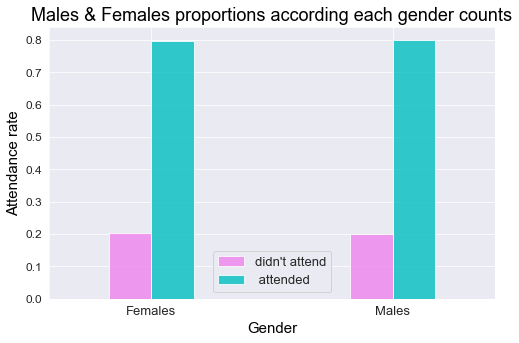

In [35]:
# Bar chart for showed males and females proportions according to each gender

gender_proportion.plot(kind = "bar",
                       rot = 0,
                       width = 0.35,
                       color=["violet","c"],
                       alpha = 0.8,
                       fontsize = 12,
                       figsize=(8,5)
                         )

plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Gender",fontsize=15, color="k")
plt.title("Males & Females proportions according each gender counts",fontsize=18, color="k")
labels = ["Females","Males"]
plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["didn't attend"," attended"],fontsize=13);


### Answer 1
###### From first visualization we can clearly notice that Females usually have more appointments than Males patients. So we can conclude that the gender might be an important factor. But as the second visualization the attendance rate was so close for both genders.
   - Percentage of Females who attended is 79.68% from all Females. 
   - Percentage of Males who attended is 80% from all Males.
   
(That means there's no direct correlation between Gender and attendance & both genders have the same commitment to attend the medical appointment.)



### Research Question 2 
> #### How the Alcoholism affect probability of show up?
       - ratio for patients who have alcoholism and attended the appointment.
       - ratio for patients who don't have alcoholism and attended the appointment.
     
     

In [36]:
# getting Alcoholism proportions using (proportions_fun)

alcoholism_proportions = proportions_fun(df,["Alcoholism"],"Show")
alcoholism_proportions

Show,0,1
Alcoholism,,
0,0.201948,0.798052
1,0.201488,0.798512


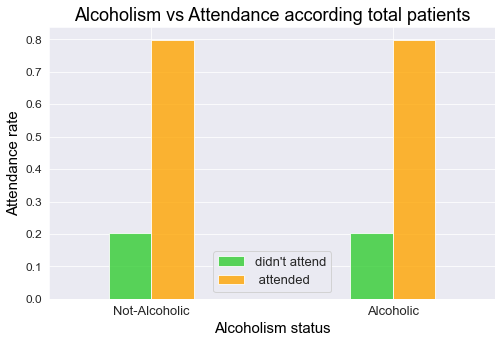

In [37]:
# Bar chart showed Alcoholic and not-Alcoholic proportions

alcoholism_proportions.plot(kind = "bar",
                            rot = 0,
                            width = 0.35,
                            color=["limegreen","orange"],
                            alpha = 0.8,
                            fontsize = 12,
                            figsize=(8,5)
                             )

plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Alcoholism status",fontsize=15, color="k")
plt.title("Alcoholism vs Attendance according total patients", fontsize=18, color="k") 
labels = ["Not-Alcoholic","Alcoholic"]
plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["didn't attend"," attended"],fontsize=13);

### Answer 2
* From above visualisation we can conclude the attendance rate is so close for both Alcoholic & not Alcoholic patients. They have the same commitment to attend the medical appointment.
   - Percentage of Alcoholic patients who attended is 79.85% from all Alcoholic patients. 
   - Percentage of Not_Alcoholic patients who attended is 79.80% from all Not-Alcoholic patients 
   
(That means there's no direct correlation between Alcoholism and attendance.)


### Research Question 3 
> #### How the Hypertension affect probability of show up?
     - ratio for patients who have hypertension and attended the appointment.
     - ratio for patients who don't have hypertension and attended the appointment.

In [38]:
# getting Hypertension proportions using (proportions_fun)

hypertension_proportions = proportions_fun(df,["Hipertension"],"Show")
hypertension_proportions

Show,0,1
Hipertension,,
0,0.209039,0.790961
1,0.173020,0.826980


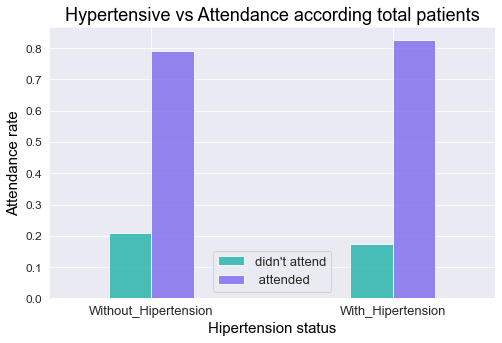

In [39]:
# Bar Chart for proportions of patients who have and don't have Hipertension according to total number of patients

hypertension_proportions.plot(kind = "bar",
                               rot = 0,
                               width = 0.35,
                               color=["lightseagreen","mediumslateblue"],
                               alpha = 0.8,
                               fontsize = 12,
                               figsize=(8,5)
                                 )

plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Hipertension status",fontsize=15, color="k")
plt.title("Hypertensive vs Attendance according total patients", fontsize=18, color="k") 
labels = ["Without_Hipertension","With_Hipertension"]
plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["didn't attend"," attended"],fontsize=13);

### Answer 3

* From above visualisation we can conclude the attendance rate is so close for both patients who have Hipertension and don't have Hipertension.They have the same commitment to attend the medical appointment.
   - Percentage of patients who has Hipertension and attended is 82.69% from all patients who has Hipertension. 
   - Percentage of patients who hasn't Hipertension and attended is 79.09% from all patients who hasn't Hipertension. 

(That means there's no direct correlation between Hypertensive and attendance also.)


### Research Question 4 
> #### How the Handicap affect probability of show up?
     - ratio for patients who have handicap and attended the appointment.
     - ratio for patients who don't have handicap and attended the appointment.

In [40]:
# getting Handcap proportions using (proportions_fun)

handcap_proportions = proportions_fun(df,["Handcap"],"Show")
handcap_proportions


Show,0,1
Handcap,,
0,0.202355,0.797645
1,0.179236,0.820764
2,0.202186,0.797814
3,0.230769,0.769231
4,0.333333,0.666667


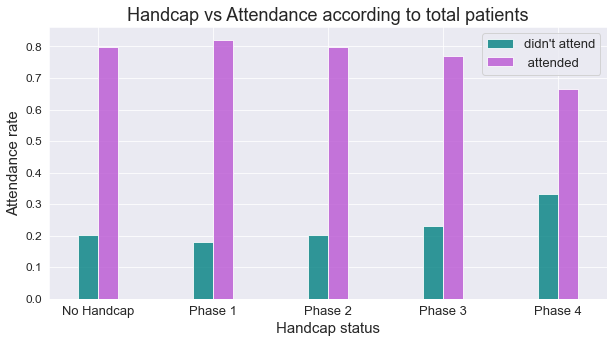

In [41]:
# Bar Chart for proportions of patients who have and don't have Handcap according to total number of patients

handcap_proportions.plot(kind = "bar",
                               rot = 0,
                               width = 0.35,
                               color=["teal","mediumorchid"],
                               alpha = 0.8,
                               fontsize = 12,
                               figsize=(10,5)
                                 )
plt.ylabel("Attendance rate", fontsize=15)
plt.xlabel("Handcap status", fontsize=15)
plt.title("Handcap vs Attendance according to total patients", fontsize=18)
labels = ['No Handcap', 'Phase 1','Phase 2','Phase 3','Phase 4']
plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["didn't attend"," attended"],fontsize=13);

From above visualisation we can clearly see that the Handcap 4 patients have the lowest attending ratio (66.66%) but to be sure from the correlation we must check count number for all Handcap phase 4 patients.

In [42]:
df.query("Handcap == 4")["Handcap"].count()

3

### Answer 4

* From above visualisations the attendance rate is so close for patients who have Handcap and patients with Handcap phases (1,2,3). While Handcap phase (4) patients have the lowest attending ratio (66.66%) with total count (3 patients).so we can't consider this propotion for the correlation to medical appointment attendance.
   - Percentage of patients who don't have Handcap and attended is 79.76% from all patients who has Hipertension.
   - Percentage of patients who have Handcap and attended from all patients is:
      - 82.07%  Handcap phase 1. 
      - 79.78%  Handcap phase 2. 
      - 76.92%  Handcap phase 3. 
      - 66.66%  Handcap phase 4. 
      
(That means there's no direct correlation between Handcap and attendance.)


### Research Question 5
> #### How the Diabetes affect probability of show up?
     - ratio for patients who have diabetes and attended the appointment.
     - ratio for patients who don't have diabetes and attended the appointment.

In [43]:
# getting Diabetes proportions using (proportions_fun)

diabetes_proportions = proportions_fun(df,["Diabetes"],"Show")
diabetes_proportions

Show,0,1
Diabetes,,
0,0.203630,0.796370
1,0.180033,0.819967


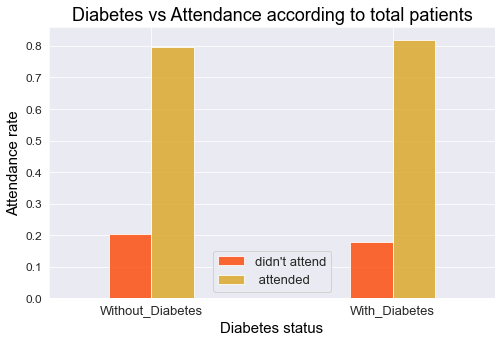

In [44]:
# Bar Chart for proportions of patients who have and don't have Diabetes according to total number of patients

diabetes_proportions.plot(kind = "bar",
                               rot = 0,
                               width = 0.35,
                               color=["orangered","goldenrod"],
                               alpha = 0.8,
                               fontsize = 12,
                               figsize=(8,5)
                                 )
plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Diabetes status",fontsize=15, color="k")
plt.title("Diabetes vs Attendance according to total patients", fontsize=18, color="k")
labels = ['Without_Diabetes', 'With_Diabetes']
plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["didn't attend"," attended"],fontsize=13);

### Answer 5

* From above visualisation the attendance rate is so close for both patients who have Diabetes and don't have Diabetes.They have the same commitment to attend the medical appointment.
   - Percentage of patients who have Diabetes and attended is 81.99% from all patients who has Diabetes. 
   - Percentage of patients who don't have Diabetes and attended is 79.63% from all patients who hasn't Diabetes. 
   
(That means there's no direct correlation between Diabetes and attendance.)


### Research Question 6
> #### How the Scholarship affect probability of show up?
     - ratio for patients who have Scholarship and attended the appointment.
     - ratio for patients who don't have Scholarship and attended the appointment.

In [45]:
# getting Scholarship proportions using (proportions_fun)

scholarship_proportions = proportions_fun(df,["Scholarship"],"Show")
scholarship_proportions

Show,0,1
Scholarship,,
0,0.198074,0.801926
1,0.237363,0.762637


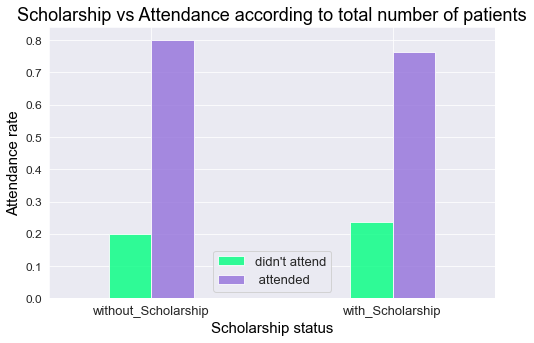

In [46]:
# Chart for proportions of patients who have and don't have scholarship_proportions according to total number of patients

scholarship_proportions.plot(kind = "bar",
                               rot = 0,
                               width = 0.35,
                               color=["springgreen","mediumpurple"],
                               alpha = 0.8,
                               fontsize = 12,
                               figsize=(8,5)
                                 )
plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Scholarship status",fontsize=15, color="k")
plt.title("Scholarship vs Attendance according to total number of patients", fontsize=18, color="k") 
labels = ['without_Scholarship', 'with_Scholarship']
plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["didn't attend"," attended"],fontsize=13);

### Answer 6

* From above visualisation the attendance rate is so close for both patients who have and don't have Scholarship.They have the same commitment to attend the medical appointment.
   - Percentage of patients who has Scholarship and attended is 76.26% from all patients who has Scholarship. 
   - Percentage of patients who hasn't Scholarship and attended is 80.19% from all patients who hasn't Scholarship. 
   
(That means there's no direct correlation between Scholarship and attendance.)


### Research Question 7
> #### Does receiving SMS affect the attendance?
     - ratio for patients who received SMS and attended the appointment.
     - ratio for patients who didn't receive SMS and attended the appointment.

In [47]:
# getting received SMS proportions using (proportions_calc function)

sms_proportions =  proportions_fun(df,["SMS_received"],"Show")
sms_proportions

Show,0,1
SMS_received,,
0,0.167035,0.832965
1,0.275745,0.724255


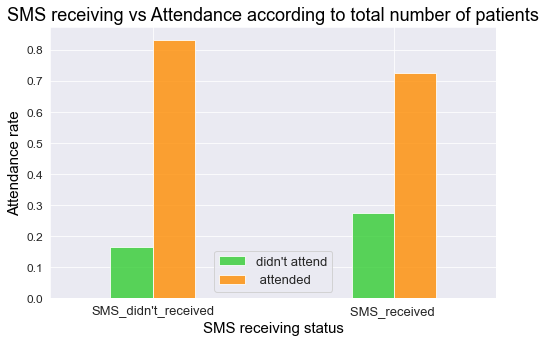

In [48]:
# Bar Chart for proportions of patients who received SMS and who didn't according to total number of patients

sms_proportions.plot(kind = "bar",
                               rot = 0,
                               width = 0.35,
                               color=["limegreen","darkorange"],
                               alpha = 0.8,
                               fontsize = 12,
                               figsize=(8,5)
                                 )
plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("SMS receiving status",fontsize=15, color="k")
plt.title("SMS receiving vs Attendance according to total number of patients", fontsize=18, color="k") 
labels = ["SMS_didn't_received", "SMS_received "]
plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["didn't attend"," attended"],fontsize=13);

### Answer 7

* The attendance rate for patient who have not recieved SMS is higher
    - Percentage of patients who have recieved SMS and attended is 76.26% from all patients who recieved SMS. 
    - Percentage of patients who have not recieved SMS  and attended is 80.19% from all patients who didn't receive SMS.
* This result is unexpected. Usually patients who already received SMS attending rate is higher.

(That means there's no direct correlation between SMS receiving and attendance.)

### Research Question 8
> #### Does Age affect the attendance?

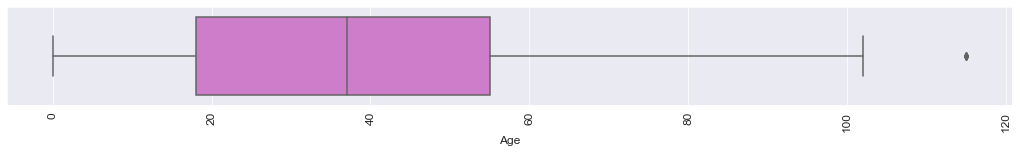

In [49]:
# Boxplot: Age for all patients

plt.figure(figsize=(18,1.8))
plt.xticks(rotation=90)
sns.boxplot(x=df.Age,color="orchid");

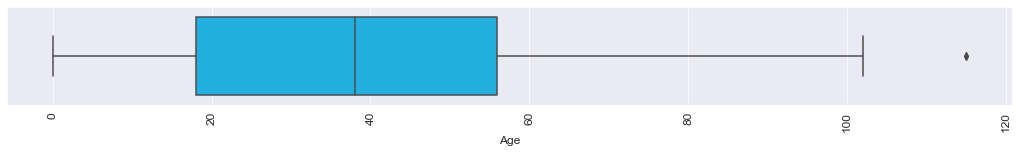

In [50]:
# Boxplot: Age for patient who atteneded only

plt.figure(figsize=(18,1.8))
plt.xticks(rotation=90)
sns.boxplot(x=df_show.Age,color="deepskyblue");

from above boxplots we can see that:

* Maximum age is same for both (115)
* Minimum Age is same for both (0)
* First quartile Age is same for both(18)

* Median Age for total patients is (37)
* Median Age for attended patients is (38)
* Third quartile Age for total patients is (55)
* Third quartile Age for attended patients is (56) 

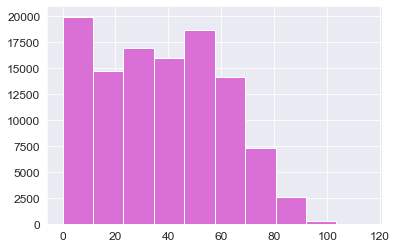

In [51]:
# checking for Age skewness for all patients

df["Age"].hist(color=["orchid"]);

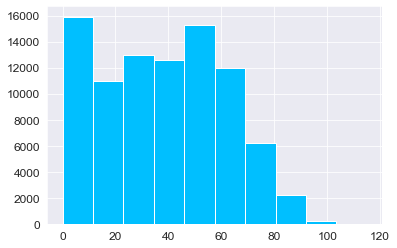

In [52]:
# checking for Age skewness for atteneded patients only

df_show["Age"].hist(color=["deepskyblue"]);

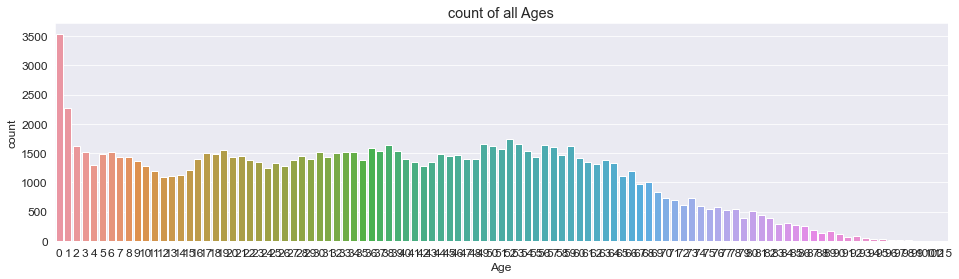

In [53]:
plt.figure(figsize=(16,4))
sns.countplot(x=df.Age).set_title("count of all Ages")
plt.show();

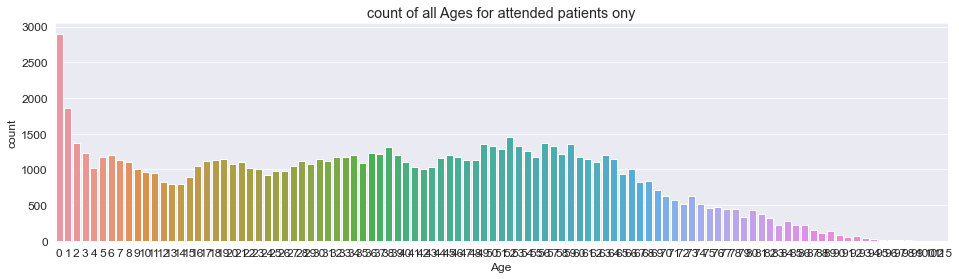

In [54]:
plt.figure(figsize=(16,4))
sns.countplot(x=df_show.Age)
plt.title("count of all Ages for attended patients ony");

From above visualisations we can see that:
* Count of infants (0 : 2 years) who made appointment is so high compared with other Ages counts
* Count of infants (0 : 2 years) who showed up for appointment is so high compared with other Ages counts

(so we need to check the proportion for Ages to make certain from the correlation with attendance)

In [55]:
# getting Age proportions using (proportions_calc function)

age_proportions = proportions_fun(df,["Age"],"Show")
age_proportions

Show,0,1
Age,,
0,0.180559,0.819441
1,0.182578,0.817422
2,0.155748,0.844252
3,0.183080,0.816920
4,0.217090,0.782910
...,...,...
98,0.166667,0.833333
99,NaN,1.000000
100,NaN,1.000000


In [56]:
# fill nan values with zero

age_proportions.fillna(0, inplace=True)

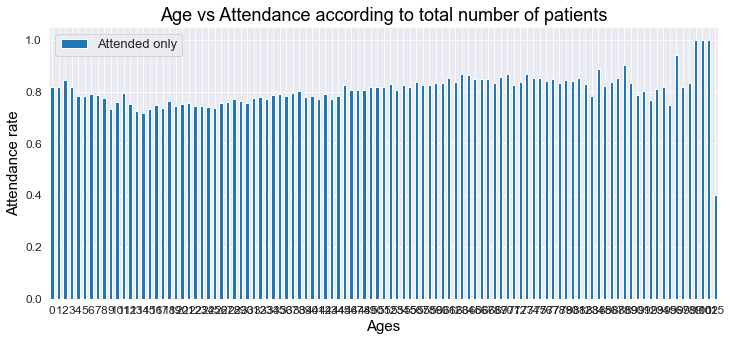

In [57]:
# Bar Chart for Age proportions acording to all patients

age_proportions[1].plot(kind = "bar",
                               rot = 0,
                               alpha = 1,
                               fontsize = 12,
                               figsize=(12,5)
                                 )
plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Ages",fontsize=15, color="k")
plt.title("Age vs Attendance according to total number of patients", fontsize=18, color="k") 
plt.legend(["Attended only"],fontsize=13);

* From above visualisations we can notice that most of age range attendance ratio is over than 80% but the ratio for teenagers is lower. and the ratio is too high for very old patients so we need to check the count of them to make certain from direct correlation.

In [58]:
df.query("Age>95").shape[0] , df.query("Age>13 & Age < 25").shape[0] 

(46, 15128)

* There are 46 patient older than 95 years with very high attendance ratio.
* There are 15128 patient older than 13 and lower than 25 with low attendance ratio.

(Now I'm going to make Age categories to know which category has high attendance ratio and which category has low ratio.

In [59]:
# getting proportions for age categories (count of category who attended divide by count of total for same category)

proportions_inf = (df_show.query("Age >=0 & Age<=1").count() / df.query("Age >=0 & Age<=1")["Age"].count())["Age"]
proportions_kids= (df_show.query("Age >=2 & Age<=12").count() / df.query("Age >=2 & Age<=12")["Age"].count())["Age"]
proportions_teens= (df_show.query("Age >=13 & Age<=20").count() / df.query("Age >=13 & Age<=20")["Age"].count())["Age"]
proportions_adults= (df_show.query("Age >=21 & Age<=60").count() / df.query("Age >=21 & Age<=60")["Age"].count())["Age"]
proportions_old = (df_show.query("Age >=61").count() / df.query("Age >=61 ")["Age"].count())["Age"]

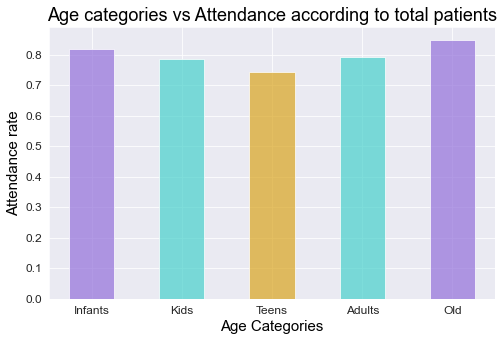

In [60]:
# Bar # Chart for Age categories
age_count_ind = ["Infants","Kids","Teens","Adults","Old"]
hights = [proportions_inf,proportions_kids,proportions_teens,proportions_adults,proportions_old]
width=0.5
plt.figure(figsize=(8,5))
plt.bar(age_count_ind, hights,width,color=["mediumpurple","mediumturquoise","goldenrod","mediumturquoise","mediumpurple"], alpha = .7)
plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Age Categories",fontsize=15, color="k")
plt.title("Age categories vs Attendance according to total patients", fontsize=18, color="k") 
plt.show();

### Answer 8

* Teens patients (13:20 years) category has the lowest attendance ratio (74.20%).
* Old patients (over 60 years) and infant patients (0:2 years) categories have the highest attendance rate:
  - old ratio is (84.78%).
  - infant ratio is (81.87%).
* Kids patients (3:12) and adults patients (21:60 years) categories have the highest attendance rate:
  - Kids ratio is (78.63%).
  - Adult ratio is (79.26%).
  
( From previous visualisation we can conclude Teeanagers patients  commitment to attend the medical appoinment is too low while infants and old people commitment to attend the medical appoinment is so high.)



### Research Question 9
> #### Does appointment delay affect the attendance?

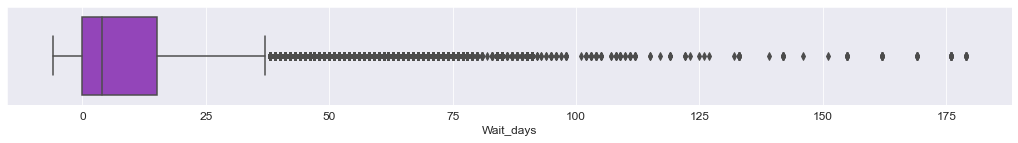

In [61]:
# Boxplot for Wait_days for all patients

plt.figure(figsize=(18,1.8))
sns.boxplot(x=df.Wait_days,color="darkorchid");

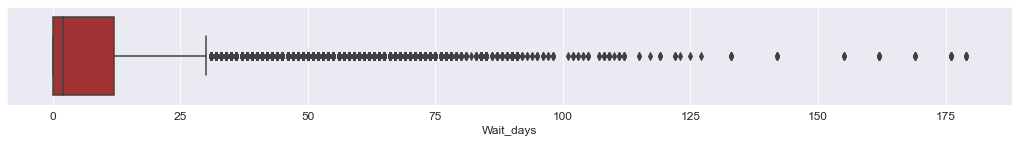

In [62]:
# Boxplot for Wait_days for patients who atteneded only

plt.figure(figsize=(18,1.8))
sns.boxplot(x=df_show.Wait_days,color="firebrick");

from above boxplots we can see that:

* Maximum wait days is same for both (197)
* First quartile wait days is same for both (0)

* Minimum wait days for total patients is (-6)
*  Minimum wait days for attended patients is (0)
* Median wait days for total patients is (4)
* Median wait days for attended patients is (2)
* Third quartile wait days for total patients is (15)
* Third quartile wait days for attended patients is (12) 

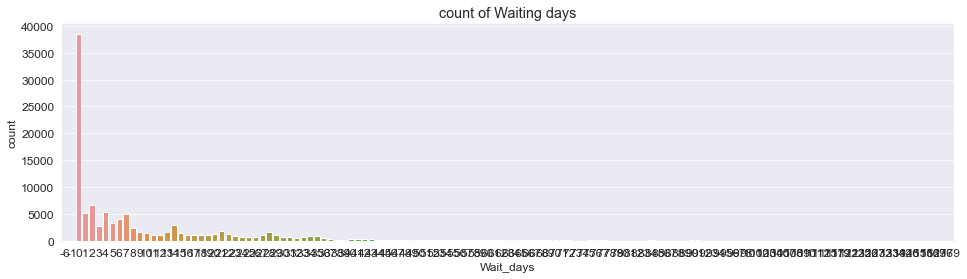

In [63]:
# count of waiting days for all patients

plt.figure(figsize=(16,4))
sns.countplot(x=df.Wait_days).set_title("count of Waiting days")
plt.show()

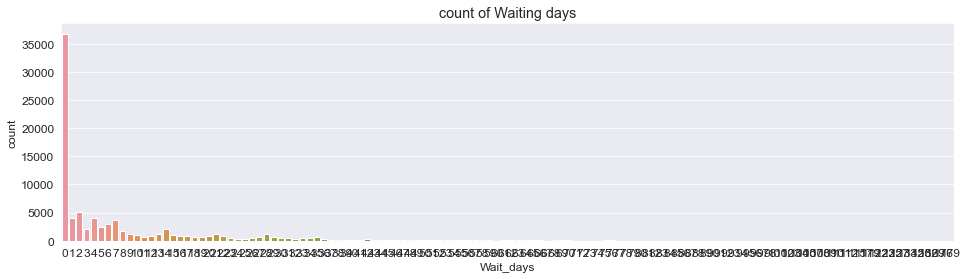

In [64]:
# count of waiting days for attended patients only

plt.figure(figsize=(16,4))
sns.countplot(x=df_show.Wait_days).set_title("count of Waiting days")
plt.show()

From above visualisations we can see that:

* Count of patients who have no wating days at all and showed up for appointment is too high (over 35000 patient)
* count of patients is being lower when wating days is being higher

(so we need to check the proportion for wating days to make certain from the correlation with attendance)

In [65]:
# getting wait_days_proportions using (proportions_fun)

wait_days_proportions = proportions_fun(df,["Wait_days"],"Show")
wait_days_proportions

Show,0,1
Wait_days,,
-6,1.000000,NaN
-1,1.000000,NaN
0,0.046471,0.953529
1,0.213505,0.786495
2,0.238216,0.761784
...,...,...
155,0.600000,0.400000
162,0.181818,0.818182
169,0.125000,0.875000


In [66]:
# fill nan values with 0
wait_days_proportions.fillna(0, inplace=True)

In [67]:
wait_days_proportions[0]

Wait_days
-6      1.000000
-1      1.000000
 0      0.046471
 1      0.213505
 2      0.238216
          ...   
 155    0.600000
 162    0.181818
 169    0.125000
 176    0.375000
 179    0.200000
Name: 0, Length: 131, dtype: float64

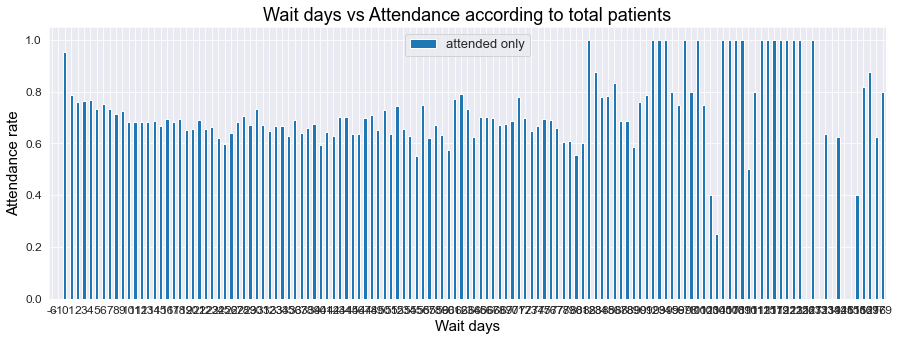

In [68]:
# Bar Chart for wait days proporation 

wait_days_proportions[1].plot(kind = "bar",
                               rot = 0,
                               alpha = 1,
                               fontsize = 12,
                               figsize=(15,5)
                                 )
plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Wait days",fontsize=15, color="k")
plt.title("Wait days vs Attendance according to total patients", fontsize=18, color="k") 
plt.legend(["attended only"],fontsize=13);
plt.show();

### Answer 9

From the above visualization we can see that most patient who has 0 wait days attended to the appointment. thier attendance ratio is around (95%). The count of patients with high waiting days is so low as we mentioned on previous count bar chart.

(We can conclude that there's no direct relation between appointment delay and attendance but for sure if wait time is 0 the patients will mostly attend.this factor is very important and can help us alot to make better prediction)

### Extra research
> #### After checking all columns relation with show and no show column I coudn't find a direct correlation between one factor and attendance, so I'm going to try to find the impact of  tow factors together on attendance 

In [69]:
# the impact of ALcoholism and gender on attendance using (proportions_fun)

gender_alcoholism_proportions = proportions_fun(df,["Gender","Alcoholism"],"Show")
gender_alcoholism_proportions

Show                      0         1
Gender Alcoholism                    
F      0           0.202305  0.797695
       1           0.251840  0.748160
M      0           0.201259  0.798741
       1           0.172672  0.827328

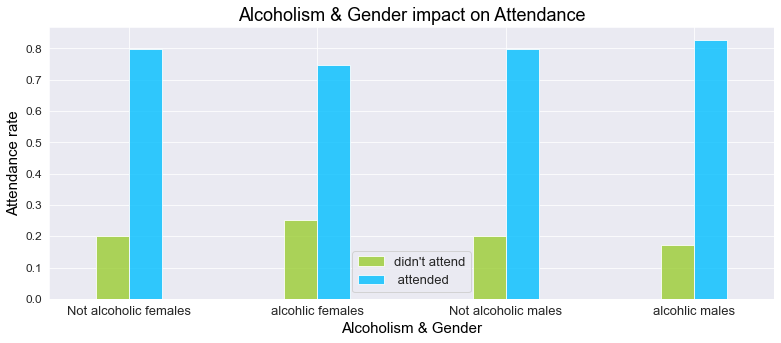

In [84]:
# Bar chart for ALcoholism and gender impact on attendance

gender_alcoholism_proportions.plot(kind = "bar",
                               rot = 0,
                               width = 0.35,
                               color=["yellowgreen","deepskyblue"],
                               alpha = 0.8,
                               fontsize = 12,
                               figsize=(13,5)
                                 )
plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Alcoholism & Gender",fontsize=15, color="k")
plt.title("Alcoholism & Gender impact on Attendance", fontsize=18, color="k") 
labels = ['Not alcoholic females',"alcohlic females",'Not alcoholic males',"alcohlic males"]
plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["didn't attend"," attended"],fontsize=13);

In [78]:
# the impact of ALcoholism and scholarship on attendance using (proportions_fun)

alcoholism_scholarship_proportions = proportions_fun(df,["Alcoholism","Scholarship"],"Show")
alcoholism_scholarship_proportions

Show                           0         1
Alcoholism Scholarship                    
0          0            0.198414  0.801586
           1            0.235072  0.764928
1          0            0.186441  0.813559
           1            0.282197  0.717803

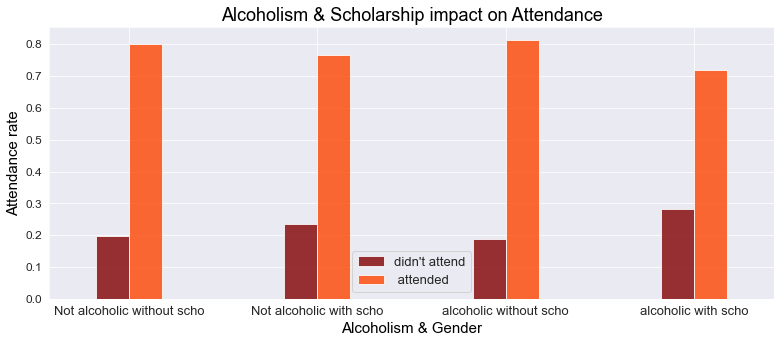

In [87]:
alcoholism_scholarship_proportions.plot(kind = "bar",
                               rot = 0,
                               width = 0.35,
                               color=["maroon","orangered"],
                               alpha = 0.8,
                               fontsize = 12,
                               figsize=(13,5)
                                 )
plt.ylabel("Attendance rate",fontsize=15, color="k")
plt.xlabel("Alcoholism & Gender",fontsize=15, color="k")
plt.title("Alcoholism & Scholarship impact on Attendance", fontsize=18, color="k") 
labels = ['Not alcoholic without scho',"Not alcoholic with scho",'alcoholic without scho',"alcoholic with scho"]
plt.xticks(range(len(labels)),labels, fontsize=13);
plt.legend(["didn't attend"," attended"],fontsize=13);

## Extra research Answer

* The attendance rate for Females who have Alcoholism is the lowest.
    - Females patients who have Alcoholism are attending with 74.81%.
    - Male patients who have Alcoholism are attending with 82.73%.
    - Females patients who haven't Alcoholism are attending with 79.76%.
    - Male patients who have Alcoholism are attending with 79.87%.
    
* The attendance rate for Alcoholic patients who have scholarship is the lowest.
    - Not Alcoholic patients without Scholarship are attending with 80.16%.
    - Not Alcoholic patients with Scholarship are attending with 76.49%.
    - Alcoholic patients without Scholarship are attending with 81.36%.
    - Alcoholic patients with Scholarship are attending with 71.78%.

<a id='conclusions'></a>
## Conclusions


> * Attendance rate is too high  79.8% from all patients already attended and 20.2% only didn't attend.
> * Most attended patients are Females:
       - Females attendance ratio is 64.9%.
       - Females attendance ratio is 35,1%.
> * Gender has no direct correlation with attendance.
> * Alcoholism has no direct correlation with attendance.
> * Hypertensive has no direct correlation with attendance.
> * Handcap has no direct correlation with attendance. (Handcap phase 4 patients has lower attendance rate but thier count is 3)
> * Diabetes has no direct correlation with attendance
> * Scholarship has no direct correlation with attendance. (This result is unexpected)
> * Receiving SMS has no correlation with attendance: 
       - The attendance rate for patient who have not recieved SMS is higher (This result is unexpected)    
> * Age can affect the attendance rate : 
       - Teeanagers patients  commitment to attend the medical appoinment is too low 
       while infants and old people commitment to attend the medical appoinment is so high.
> * Appointment delay also can affect the attendance rate :
       -  there's no direct relation between appointment delay and attendance but for sure if wait time
       is 0 the patients will mostly attend.this factor is very important 
       and can help us alot to make better prediction

## Limitation

> * Age column has a lot of values that can affect the correlation between other columns and attendance like (Hipertension, Diabetes, Alcoholism, and Gender). So we can't calculate statistics or find correlation accurately to make better predictions
        - 7430 infant (0:2 years)
        - 13196 Kids (3:13 years)
> * Age column has -one row with value(-1 years0 which isn't logical and 5 more rows with value (115 years ) wich is confusing
> * Scheduled_day and Appointment_day columns have the following issues:
        - Appointment_day column has date without hours, minutes, and seconds
        - There is no clear reason for very high waiting days (the max wait days is 197 days). 
        if the reason was clear we could explore it trying to solve any problems.
> * No show column values is No for attended and yes for didnt attend and it was confusing
